In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Tworzymy funkcję–model (KMcK z artykułu P. Krzyżanowskiego)

In [49]:
def model(a, b, s_0=100, i_0=1, r_0=0, n=1000):
    # a, b – współczynniki zdrowienia i zarażania się odpowiednio
    # s_0, i_0, r_0 – wartości początkowe s, i, r odpowiednio
    # n – długosć czasu symulacji
    s, i, r = np.zeros(n), np.zeros(n), np.zeros(n)
    s[0], i[0], r[0] = s_0, i_0, r_0
    for t in range(n - 1):
        s[t + 1] = s[t] - b * i[t] * s[t]
        i[t + 1] = i[t] + b * i[t] * s[t] - a * i[t]
        r[t + 1] = r[t] + a * i[t]
    return s, i, r

Weźmy epidemię koronawirusa w Polsce. 
Mamy wtedy zdrowych: 40 milionów (4 * 10 ** 7)
Chorych na dzień dajmy na to 10 marca: 22 (potwierdzonych, prawdopodbnie faktycznie było już wtedy dużo więcej)
Wyzdrowiałych: 0
$\frac{1}{a}$ to średnia długość czasu zarażania. Dla koronawirusa załóżmy że będzie to około 5 dni (`a = 0.2`), później może to poprawimy.
Wartość $b$ będziemy musieli wyznaczyć tak jak zrobił to pan P. Krzyżanowski w swoim artykule.


Do przewidzenia wartości b wykorzystajmy także dane z Włoch i z Korei Płd. Kraje te miały dwie różne strategie walki z koronawirusem. Być może uda się zobaczyćdo którego jest nam bliżej.

In [61]:
# Legenda do "data": [deaths, recoveries, active cases]

# Dane z Włoch (za angielską Wikipedią):
italy_str = """{{Medical cases chart/Row|2020-02-22|2|2|79|||79|+295%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-02-23|3|2|150|||150|+90%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-02-24|6|1|227|||227|+51%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-02-25|10|1|320|||320|+41%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-02-26|12|3|445|||445|+39%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-02-27|17|45|650|||650|+46%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-02-28|21|46|888|||888|+37%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-02-29|29|50|1128|||1,128|+27%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-01|34|83|1694|||1,694|+50%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-02|52|149|2036|||2,036|+20%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-03|79|160|2502|||2,502|+23%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-04|107|276|3089|||3,089|+23%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-05|148|414|3858|||3,858|+25%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-06|197|523|4636|||4,636|+20%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-07|233|589|5883|||5,883|+27%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-08|366|622|7375|||7,375|+25%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-09|463|724|9172|||9,172|+24%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-10|631|1004|10149|||10,149|+11%{{efn-lr|name=delay_10Mar}}|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-11|827|1045|12462|||12,462|+23%{{efn-lr|name=delay_10Mar}}|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-12|1016|1258|15113|||15,113|+21%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-13|1266|1439|17660|||17,660|+17%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-14|1441|1966|21157|||21,157|+20%|factor=65|numwidth=mw}}
{{Medical cases chart/Row|2020-03-15|1809|2335|24747|||24,747|+17%|factor=65|numwidth=mw}}"""

italy_data = np.array([[int(l[2]), int(l[3]), int(l[4])] for l in [l.split("|") for l in italy_str.split("\n")]])
italy_pop = 60 * 10 ** 6
italy_schools_closed = 12
italy = {"data" : italy_data, "pop" : italy_pop, "schools_closed" : italy_schools_closed, "name" : "Italy"}

In [60]:
# Dane z Korei (za angielską Wikipedią):
korea_str = """{{Medical cases chart/Row|2020-02-20|1|16|104|||104|+53||+104%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-02-21|2|17|204|||204|+100||+96%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-02-22|2|18|433|||433|+229||+112%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-02-23|4|18|602|||602|+169||+39%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-02-24|7|24|833|||833|+231||+38%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-02-25|10|24|977|||977|+144||+17%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-02-26|12|24|1261|||1,261|+284||+29%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-02-27|13|27|1766|||1,766|+505||+40%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-02-28|13|27|2337|||2,337|+571||+32%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-02-29|17|28|3150|||3,150|+813||+35%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-01|22|31|4212|||4,212|+1,062||+34%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-02|28|34|4812|||4,812|+600||+14%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-03|32|41|5328|||5,328|+516||+11%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-04|35|88|5766|||5,766|+438||+8.2%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-05|42|108|6284|||6,284|+518||+9.0%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-06|44|118|6767|||6,767|+483||+7.7%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-07|50|130|7134|||7,134|+367||+5.4%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-08|51|166|7382|||7,382|+248||+3.5%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-09|54|247|7513|||7,513|+131||+1.8%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-10|60|288|7755|||7,755|+242||+3.2%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-11|66|333|7869|||7,869|+114||+1.5%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-12|67|510|7979|||7,979|+110||+1.4%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-13|72|714|8086|||8,086|+107||+1.3%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-14|75|834|8162|||8,162|+76||+0.94%|factor=33|numwidth=twnw}}
{{Medical cases chart/Row|2020-03-15|75|1137|8236|||8,236|+74||+0.90%|factor=33|numwidth=twnw}}"""

korea_data = np.array([[int(l[2]), int(l[3]), int(l[4])] for l in [l.split("|") for l in korea_str.split("\n")]])
korea_pop = 51.7 * 10 ** 6
korea_schools_closed = 3
korea = {"data" : korea_data, "pop" : korea_pop, "schools_closed" : korea_schools_closed, "name" : "South Korea"}

In [59]:
# Dane z Polski (za angielską Wikipedią):
poland_str = """{{Medical cases chart/Row|2020-03-04|0|0|1|||1|firstright1=y|factor=0.6}}
{{Medical cases chart/Row|2020-03-05|0|0|1|||1|+0%|factor=0.6}}
{{Medical cases chart/Row|2020-03-06|0|0|5|||5|+400%|factor=0.6}}
{{Medical cases chart/Row|2020-03-07|0|0|6|||6|+20%|factor=0.6}}
{{Medical cases chart/Row|2020-03-08|0|0|11|||11|+83%|factor=0.6}}
{{Medical cases chart/Row|2020-03-09|0|0|17|||17|+55%|factor=0.6}}
{{Medical cases chart/Row|2020-03-10|0|0|22|||22|+29%|factor=0.6}}
{{Medical cases chart/Row|2020-03-11|0|0|31|||31|+41%|factor=0.6}}
{{Medical cases chart/Row|2020-03-12|1|0|51|||51|+65%|factor=0.6}}
{{Medical cases chart/Row|2020-03-13|2|0|68|||68|+33%|factor=0.6}}
{{Medical cases chart/Row|2020-03-14|3|0|104|||104|+53%|factor=0.6}}
{{Medical cases chart/Row|2020-03-15|3|0|125|||125|+20%|factor=0.6}}
{{Medical cases chart/Row|2020-03-16|3|0|150|||150|+20%|factor=0.6}}"""

poland_data = np.array([[int(l[2]), int(l[3]), int(l[4])] for l in [l.split("|") for l in poland_str.split("\n")]])
poland_pop = 38 * 10 ** 6
poland_schools_closed = 7
poland = {"data" : poland_data, "pop" : poland_pop, "schools_closed" : poland_schools_closed, "name" : "Poland"}

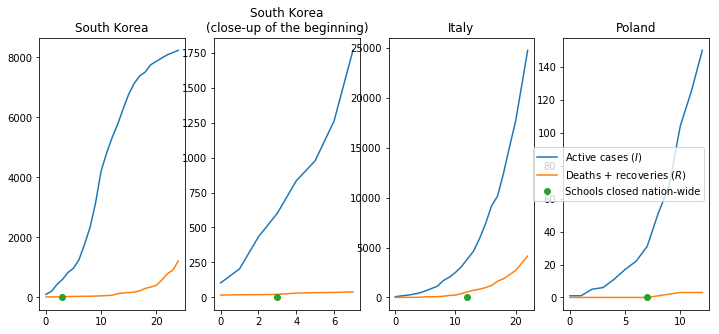

In [48]:
plt.figure(figsize=(12,5))
plt.subplot(1, 4, 1)
plt.plot(korea_data[:, 2], label="Active cases ($I$)")
plt.plot(korea_data[:,0] + korea_data[:, 1], label="Deaths + recoveries ($R$)")
plt.plot(korea_schools_closed, 0, 'o')
plt.title("South Korea")

plt.subplot(1, 4, 2)
plt.plot(korea_data[:8, 2], label="Active cases ($I$)")
plt.plot(korea_data[:8,0] + korea_data[:8, 1], label="Deaths + recoveries ($R$)")
plt.plot(korea_schools_closed, 0, 'o')
plt.title("South Korea\n(close-up of the beginning)")

plt.subplot(1, 4, 3)
plt.plot(italy_data[:, 2], label="Active cases ($I$)")
plt.plot(italy_data[:,0] + italy_data[:, 1], label="Deaths + recoveries ($R$)")
plt.plot(italy_schools_closed, 0, 'o')
plt.title("Italy")

plt.subplot(1, 4, 4)
plt.plot(poland_data[:, 2], label="Active cases ($I$)")
plt.plot(poland_data[:,0] + poland_data[:, 1], label="Deaths + recoveries ($R$)")
plt.plot(poland_schools_closed, 0, 'o', label="Schools closed nation-wide")
plt.title("Poland")
plt.legend()

Widać, że Korea dużo więcej ludzi testowała niż Polska czy Włochy, bo ma dużo większą dysproporcję między liczbą wyzdrowień/zgonów, a liczbą potwierdzonych przypadków. Dosyć wcześnie wprowadziła też zaostrzenia przepływu osób co tu symbolizujemy przez zaznaczenie dnia w którym zamknięte zostały wszystkie szkoły. Polska zareagowała podobnie szybko, natomiast Włochy dosyć późno. 

Sprawdźmy jakie $b$ wychodzi nam dla tych trzech krajów, metodą z artykułu Piotra Krzyżanowskiego.

In [170]:
def f_r(b, country, n=30, spreading_days=5):
    # Returns recoveries and deaths modelled, default: over a month
    data = country["data"]
    a = 1 / spreading_days
    s_0 = country["pop"]
    s, i, r = model(a, b, s_0=s_0, i_0=data[0, 2], n=n)
    return r

def f_i(b, country, n=30, spreading_days=5):
    # Returns number of infected modelled, default: over a month
    data = country["data"]
    a = 1 / spreading_days
    s_0 = country["pop"]
    s, i, r = model(a, b, s_0=s_0, i_0=data[0, 2], n=n)
    return i

In [173]:
from scipy.optimize import leastsq
results = dict()
for country in [poland, korea, italy]:
    res = leastsq(lambda x : f_i(x, country, n=len(country["data"])) - country["data"][:, 2], 0.00000004)
    print(country["name"], res)
    results[country["name"]] = res[0]

Poland (array([1.94177159e-08]), 1)
South Korea (array([8.14252158e-09]), 1)
Italy (array([8.4453634e-09]), 1)


In [174]:
# A co gdy patrzymy na śmierci i wyzdrowienia zamiast na potwierdzone infekcje?

results = dict()
for country in [poland, korea, italy]:
    res = leastsq(lambda x : f_r(x, country, n=len(country["data"])) - country["data"][:, 2], 0.00000004)
    print(country["name"], res)
    results[country["name"]] = res[0]

Poland (array([2.40499784e-08]), 1)
South Korea (array([8.26172914e-09]), 1)
Italy (array([8.99606841e-09]), 1)


In [175]:
# A co jeżeli zarażamy krócej, np. tylko 3 dni?

results = dict()
for country in [poland, korea, italy]:
    res = leastsq(lambda x : f_i(x, country, n=len(country["data"]), spreading_days=3) - country["data"][:, 2], 0.00000004)
    print(country["name"], res)
    results[country["name"]] = res[0]

Poland (array([2.2926496e-08]), 1)
South Korea (array([1.07219816e-08]), 1)
Italy (array([1.0668087e-08]), 1)


W każdym przypadku dostaliśmy wartości $b$: od około $1.3 \times 10^{-8}$ do około $2.3 \times 10^{-8}$. Zobaczmy jak mając te dwie możliwe wartości może wyglądać przebieg choroby w naszym kraju (nie uwzględniamy tu zastosowania środków zapobiegawczych).

Text(0.5, 1.0, 'Poland')

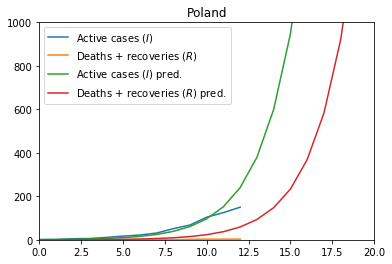

In [176]:
plt.plot(poland_data[:, 2], label="Active cases ($I$)")
plt.plot(poland_data[:,0] + poland_data[:, 1], label="Deaths + recoveries ($R$)")
plt.plot(f_i(1.9e-8, poland, n=200, spreading_days=7), label="Active cases ($I$) pred.")
plt.plot(f_r(1.9e-8, poland, n=200, spreading_days=7), label="Deaths + recoveries ($R$) pred.")
plt.ylim(0, 1000)
plt.xlim(0, 20)
plt.legend()
plt.title("Poland")

A gdybyśmy dopasowali i a i b?

In [210]:
from scipy.optimize import least_squares

results_i, results_r = dict(), dict()
for country in [poland, korea, italy]:
    res_r = least_squares(lambda x : f_r(x[0], country, spreading_days=x[1], n=len(country["data"])) - country["data"][:, 0] - country["data"][:,1],
                        [2e-8, 7])
    print("Na podstawie recoveries:")
    print(country["name"], res_r)
    results_r[country["name"]] = res_r["x"]
    
    res_i = least_squares(lambda x : f_i(x[0], country, spreading_days=x[1], n=len(country["data"])) - country["data"][:, 2],
                        [2e-8, 7])
    print("Na podstawie infections:")
    print(country["name"], res_i)
    results_i[country["name"]] = res_i["x"]

Na podstawie recoveries:
Poland  active_mask: array([0., 0.])
        cost: 1.5916953640234093
         fun: array([ 0.        ,  0.0257374 ,  0.06198215,  0.1130239 ,  0.18490357,
        0.28612827,  0.42867817,  0.62942439, -0.08787431, -0.68975959,
       -1.12911371, -0.33958303,  0.77227506])
        grad: array([1.56220339e+09, 9.92990149e-03])
         jac: array([[ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -6.62413739e-04],
       [ 9.78021191e+05, -1.57821057e-03],
       [ 4.28642098e+06, -2.84387451e-03],
       [ 1.27584305e+07, -4.59243786e-03],
       [ 3.22178078e+07, -7.00724200e-03],
       [ 7.44868065e+07, -1.03408428e-02],
       [ 1.63363648e+08, -1.49409665e-02],
       [ 3.46478848e+08, -2.12861238e-02],
       [ 7.18781166e+08, -3.00344397e-02],
       [ 1.46901663e+09, -4.20905584e-02],
       [ 2.97164872e+09, -5.86972319e-02],
       [ 5.96855472e+09, -8.15606156e-02]])
     message: '`xtol` termination condition is satisfied.'
        nfev:

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in double_scalars
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in double_scalars


In [211]:
results_i, results_r

({'Poland': array([1.83107084e-08, 7.19338415e+00]),
  'South Korea': array([2.e-08, 7.e+00]),
  'Italy': array([2.e-08, 7.e+00])},
 {'Poland': array([1.14207806e-08, 3.88539638e+01]),
  'South Korea': array([1.60016099e-08, 8.76861621e+04]),
  'Italy': array([1.77615705e-08, 3.49747534e+04])})

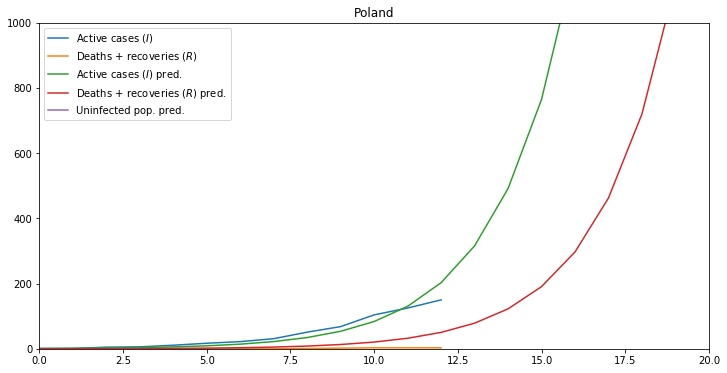

Text(0.5, 1.0, 'Poland')

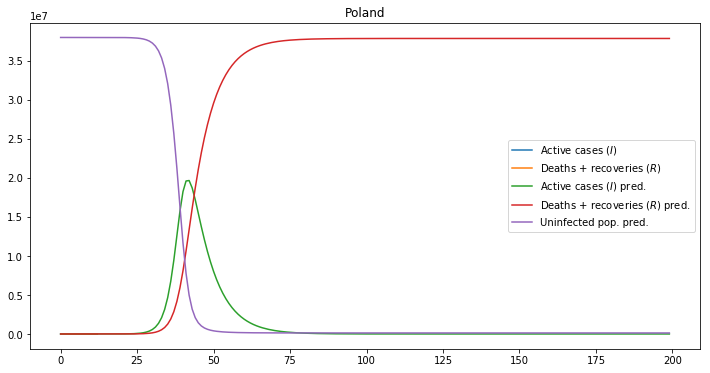

In [224]:
country_model = "Poland"
results = results_i

plt.figure(figsize=(12, 6))
plt.plot(poland_data[:, 2], label="Active cases ($I$)")
plt.plot(poland_data[:,0] + poland_data[:, 1], label="Deaths + recoveries ($R$)")
plt.plot(f_i(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]), label="Active cases ($I$) pred.")
plt.plot(f_r(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]), label="Deaths + recoveries ($R$) pred.")
plt.plot(- f_r(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]) \
               - f_i(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]) \
                    + poland["pop"], label="Uninfected pop. pred.")
plt.ylim(0, 1000)
plt.xlim(0, 20)
plt.legend()
plt.title("Poland")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(poland_data[:, 2], label="Active cases ($I$)")
plt.plot(poland_data[:,0] + poland_data[:, 1], label="Deaths + recoveries ($R$)")
plt.plot(f_i(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]), label="Active cases ($I$) pred.")
plt.plot(f_r(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]), label="Deaths + recoveries ($R$) pred.")
plt.plot(- f_r(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]) \
               - f_i(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]) \
                    + poland["pop"], label="Uninfected pop. pred.")
#plt.ylim(0, 1000)
#plt.xlim(0, 20)
plt.legend()
plt.title("Poland")

A jeżeli uwzględnimy wprowadzenie w pewnym momencie obostrzeń i kwarantann które sprawiają, że ludzie kontaktują się ze soba mniej, częściej myją ręce i w efekcie roznoszenie się wirusa jest utrudnione (np. prawdopodobieństwo zarażenia zmniejszymy czterokrotnie)?

In [261]:
def f_i_sd(b, country, n=30, spreading_days=5, social_distancing_coeff=4):
    # Returns number of infected modelled, default: over a month, includs correction for social distancing
    data = country["data"]
    a = 1 / spreading_days
    s_0 = country["pop"]
    s, i, r = np.zeros(n), np.zeros(n), np.zeros(n)
    sd = country["schools_closed"] + int(spreading_days) # Time when social distancing starts to be enforced + delay of ca. incubation period
    s[:sd], i[:sd], r[:sd] = model(a, b, s_0=s_0, i_0=data[0, 2], n=sd)
    s_rest, i_rest, r_rest = model(a, b / social_distancing_coeff, s_0=s[sd-1], i_0=i[sd-1], r_0=r[sd-1], n=n-sd+1)
    s[sd:], i[sd:], r[sd:] = s_rest[1:], i_rest[1:], r_rest[1:]
    return i

def f_r_sd(b, country, n=30, spreading_days=5, social_distancing_coeff=4):
    # Returns number of infected modelled, default: over a month, includs correction for social distancing
    data = country["data"]
    a = 1 / spreading_days
    s_0 = country["pop"]
    s, i, r = np.zeros(n), np.zeros(n), np.zeros(n)
    sd = country["schools_closed"] + int(spreading_days) # Time when social distancing starts to be enforced + delay of ca. incubation period
    s[:sd], i[:sd], r[:sd] = model(a, b, s_0=s_0, i_0=data[0, 2], n=sd)
    s_rest, i_rest, r_rest = model(a, b / social_distancing_coeff, s_0=s[sd-1], i_0=i[sd-1], r_0=r[sd-1], n=n-sd+1)
    s[sd:], i[sd:], r[sd:] = s_rest[1:], i_rest[1:], r_rest[1:]
    return r

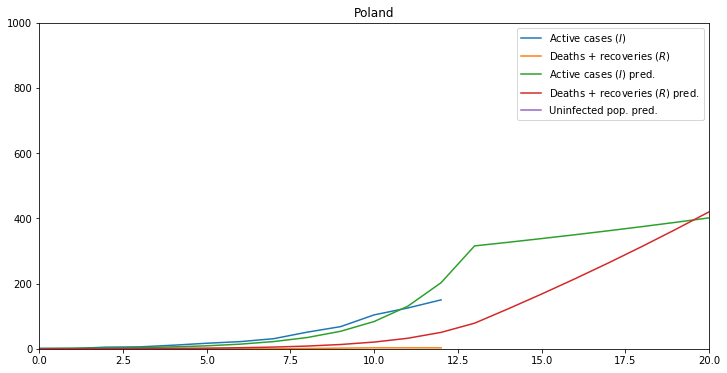

Text(0.5, 1.0, 'Poland')

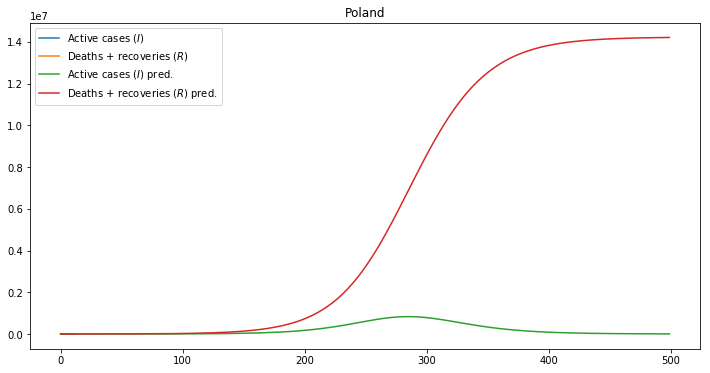

In [262]:
plt.figure(figsize=(12, 6))
plt.plot(poland_data[:, 2], label="Active cases ($I$)")
plt.plot(poland_data[:,0] + poland_data[:, 1], label="Deaths + recoveries ($R$)")
plt.plot(f_i_sd(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]), label="Active cases ($I$) pred.")
plt.plot(f_r_sd(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]), label="Deaths + recoveries ($R$) pred.")
plt.plot(- f_r_sd(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]) \
               - f_i_sd(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]) \
                    + poland["pop"], label="Uninfected pop. pred.")
plt.ylim(0, 1000)
plt.xlim(0, 20)
plt.legend()
plt.title("Poland")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(poland_data[:, 2], label="Active cases ($I$)")
plt.plot(poland_data[:,0] + poland_data[:, 1], label="Deaths + recoveries ($R$)")
plt.plot(f_i_sd(results[country_model][0], poland, n=500, spreading_days=results[country_model][1]), label="Active cases ($I$) pred.")
plt.plot(f_r_sd(results[country_model][0], poland, n=500, spreading_days=results[country_model][1]), label="Deaths + recoveries ($R$) pred.")
# plt.plot(- f_r_sd(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]) \
#               - f_i_sd(results[country_model][0], poland, n=200, spreading_days=results[country_model][1]) \
#                    + poland["pop"], label="Uninfected pop. pred.")
#plt.ylim(0, 1000)
#plt.xlim(0, 20)
plt.legend()
plt.title("Poland")

#FlattenTheCurve